# Goals ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Homework kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
data = pd.read_csv('Automobile_data.csv')

**quick look**

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape #No Duplicate data after check shape columns and row

(205, 26)

**Missing Values and Data Type**

In [9]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
# Change ? with nan, and change data type
data['normalized-losses'] = data['normalized-losses'].replace("?", np.nan)
data['normalized-losses'] = data['normalized-losses'].astype("float64")
data['num-of-doors'] = data['num-of-doors'].replace("?", np.nan)
data['bore'] = data['bore'].replace("?", np.nan)
data['bore'] = data['bore'].astype("float64")
data['stroke'] = data['stroke'].replace("?", np.nan)
data['stroke'] = data['stroke'].astype("float64")
data['horsepower'] = data['horsepower'].replace("?", np.nan)
data['horsepower'] = data['horsepower'].astype("float64")
data['peak-rpm'] = data['peak-rpm'].replace("?", np.nan)
data['peak-rpm'] = data['peak-rpm'].astype("float64")
data['price'] = data['price'].replace("?", np.nan)
data['price'] = data['price'].astype("float64")

In [11]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [12]:
data.isnull().sum() # There are several null value

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Check Distribution Data with null values

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


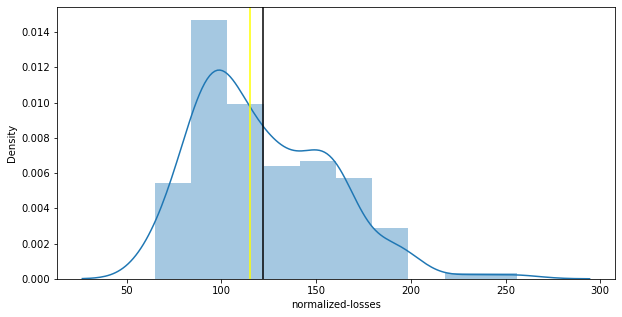

In [13]:
# Look Distribution of normalized-losses
plt.figure(figsize=(10,5))
sns.distplot(data['normalized-losses'])
plt.axvline(data['normalized-losses'].median(),color='yellow')
plt.axvline(data['normalized-losses'].mean(),color='black')
plt.show()
# can use median to fill na

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


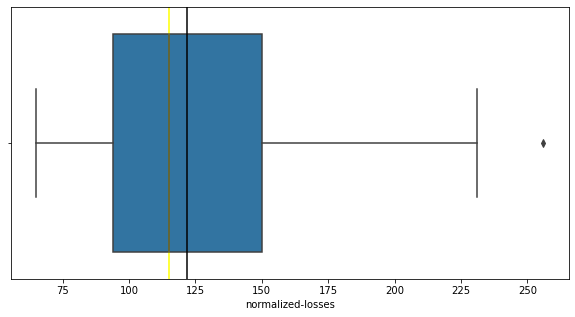

In [14]:
# Look Distribution of normalized-losses with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['normalized-losses'])
plt.axvline(data['normalized-losses'].median(),color='yellow')
plt.axvline(data['normalized-losses'].mean(),color='black')
plt.show()
# can use median to fill na
# there are several outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


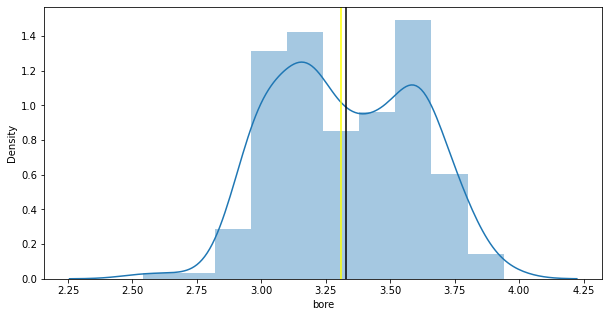

In [15]:
# Look Distribution of bore
plt.figure(figsize=(10,5))
sns.distplot(data['bore'])
plt.axvline(data['bore'].median(),color='yellow')
plt.axvline(data['bore'].mean(),color='black')
plt.show()
# can use median or mean to fill na

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


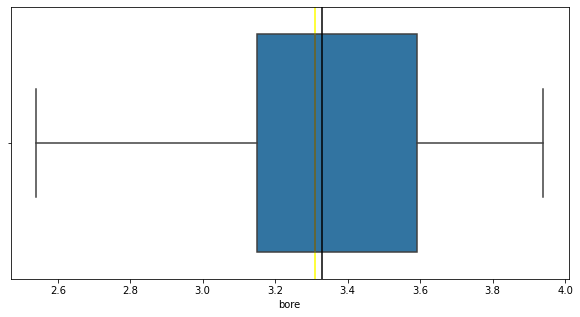

In [16]:
# Look Distribution of bore with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['bore'])
plt.axvline(data['bore'].median(),color='yellow')
plt.axvline(data['bore'].mean(),color='black')
plt.show()
# can use median or mean to fill na
# there are no outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


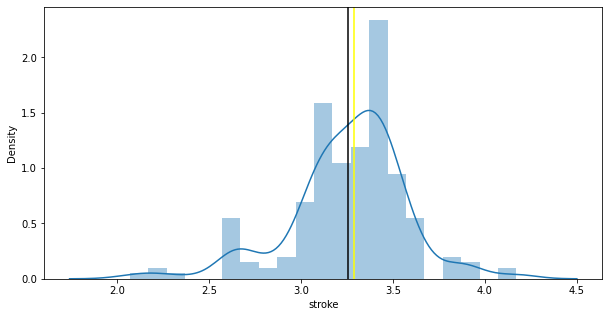

In [17]:
# Look Distribution of stroke
plt.figure(figsize=(10,5))
sns.distplot(data['stroke'])
plt.axvline(data['stroke'].median(),color='yellow')
plt.axvline(data['stroke'].mean(),color='black')
plt.show()
# can use median or mean to fill na

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


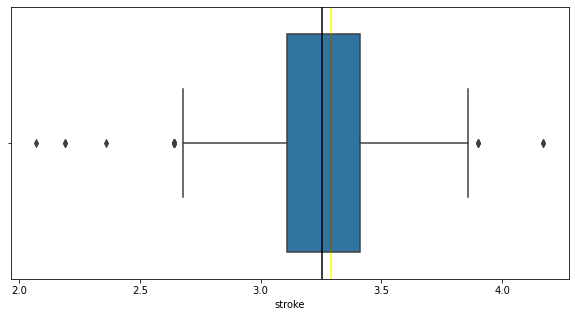

In [18]:
# Look Distribution of stroke with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['stroke'])
plt.axvline(data['stroke'].median(),color='yellow')
plt.axvline(data['stroke'].mean(),color='black')
plt.show()
# can use median or mean to fill na
# there are several outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


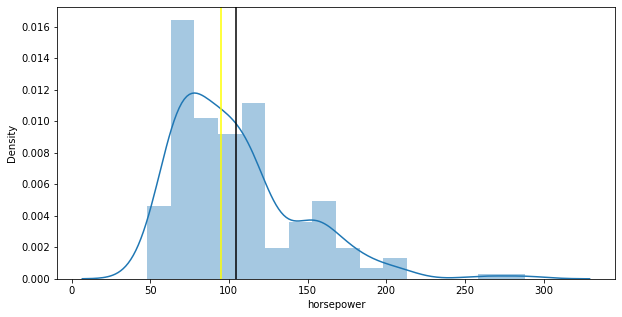

In [19]:
# Look Distribution of horsepower
plt.figure(figsize=(10,5))
sns.distplot(data['horsepower'])
plt.axvline(data['horsepower'].median(),color='yellow')
plt.axvline(data['horsepower'].mean(),color='black')
plt.show()
# can use median to fill na

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


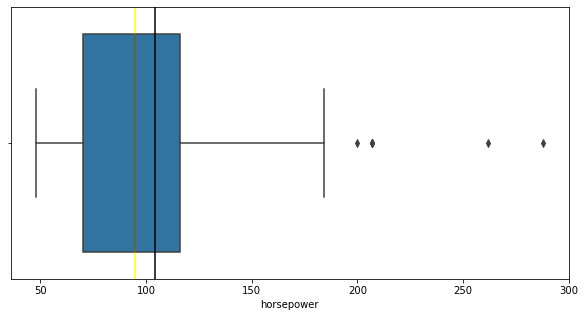

In [20]:
# Look Distribution of horsepower with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['horsepower'])
plt.axvline(data['horsepower'].median(),color='yellow')
plt.axvline(data['horsepower'].mean(),color='black')
plt.show()
# can use median to fill na
# there are several outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


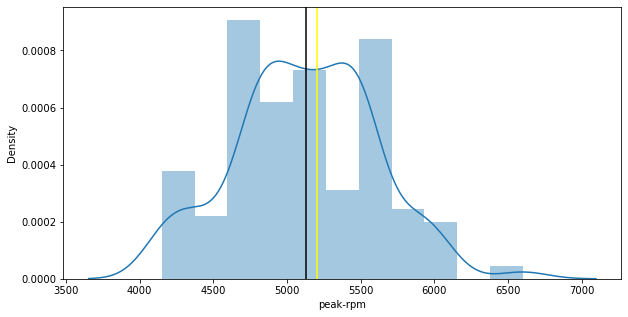

In [21]:
# Look Distribution of peak-rpm
plt.figure(figsize=(10,5))
sns.distplot(data['peak-rpm'])
plt.axvline(data['peak-rpm'].median(),color='yellow')
plt.axvline(data['peak-rpm'].mean(),color='black')
plt.show()
# can use median to fill na

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


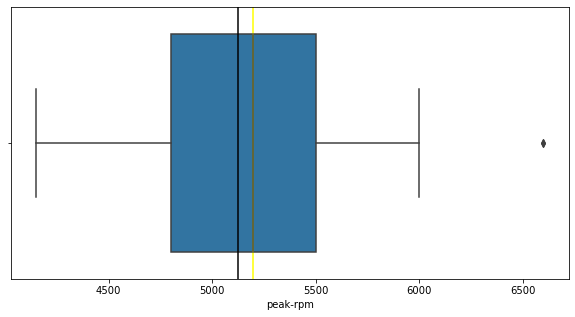

In [22]:
# Look Distribution of peak-rpm with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['peak-rpm'])
plt.axvline(data['peak-rpm'].median(),color='yellow')
plt.axvline(data['peak-rpm'].mean(),color='black')
plt.show()
# can use median to fill na
# there are several outlier in this column

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


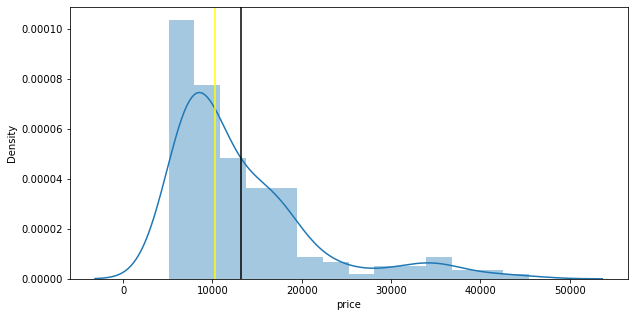

In [23]:
# Look Distribution of price
plt.figure(figsize=(10,5))
sns.distplot(data['price'])
plt.axvline(data['price'].median(),color='yellow')
plt.axvline(data['price'].mean(),color='black')
plt.show()
# can use median to fill na

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


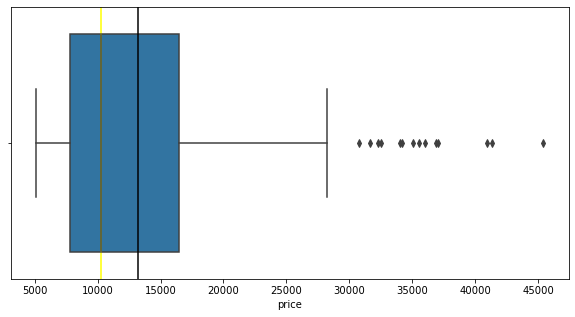

In [24]:
# Look Distribution of price with bloxplot
plt.figure(figsize=(10,5))
sns.boxplot(data['price'])
plt.axvline(data['price'].median(),color='yellow')
plt.axvline(data['price'].mean(),color='black')
plt.show()
# can use median to fill na
# there are several outlier in this column

Handling null value

In [25]:
data['num-of-doors'].value_counts()
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode()[0])

In [26]:
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].median())
data['bore'] = data['bore'].fillna(data['bore'].median())
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].median())
data['price'] = data['price'].fillna(data['price'].median())

In [27]:
data.isnull().sum() # No null value

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Check and Handling Outlier

In [28]:
# Make function to detect outlier using IQR Method
def check_outlier(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(data[data>upper_range])+len(data[data<lower_range])
    print("Total number of Outlier From Variable {} : {}".format(data.name, number_outlier))
    print("Upper Range Outlier From Variable {} : {}".format(data.name, len(data[data>upper_range])))    
    print("Lower Range Outlier From Variable {} : {}\n".format(data.name, len(data[data<lower_range])))    

In [29]:
check_outlier(data['normalized-losses'])
check_outlier(data['stroke'])
check_outlier(data['horsepower'])
check_outlier(data['peak-rpm'])
check_outlier(data['price'])

Total number of Outlier From Variable normalized-losses : 8
Upper Range Outlier From Variable normalized-losses : 8
Lower Range Outlier From Variable normalized-losses : 0

Total number of Outlier From Variable stroke : 20
Upper Range Outlier From Variable stroke : 5
Lower Range Outlier From Variable stroke : 15

Total number of Outlier From Variable horsepower : 6
Upper Range Outlier From Variable horsepower : 6
Lower Range Outlier From Variable horsepower : 0

Total number of Outlier From Variable peak-rpm : 2
Upper Range Outlier From Variable peak-rpm : 2
Lower Range Outlier From Variable peak-rpm : 0

Total number of Outlier From Variable price : 14
Upper Range Outlier From Variable price : 14
Lower Range Outlier From Variable price : 0



In [30]:
#See observation outliers on the normalized-losses variable
Q1=data["normalized-losses"].quantile(0.25)
Q3=data["normalized-losses"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['normalized-losses']>upper_range),'normalized-losses']=upper_range
check_outlier(data['normalized-losses'])

Total number of Outlier From Variable normalized-losses : 0
Upper Range Outlier From Variable normalized-losses : 0
Lower Range Outlier From Variable normalized-losses : 0



In [31]:
#See observation outliers on the stroke upper range variable
Q1=data["stroke"].quantile(0.25)
Q3=data["stroke"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['stroke']>upper_range),'stroke']=upper_range
check_outlier(data['stroke'])

Total number of Outlier From Variable stroke : 15
Upper Range Outlier From Variable stroke : 0
Lower Range Outlier From Variable stroke : 15



In [32]:
#See observation outliers on the stroke lower variable
Q1=data["stroke"].quantile(0.25)
Q3=data["stroke"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['stroke']<lower_range),'stroke']=lower_range
check_outlier(data['stroke'])

Total number of Outlier From Variable stroke : 0
Upper Range Outlier From Variable stroke : 0
Lower Range Outlier From Variable stroke : 0



In [33]:
#See observation outliers on the horsepower range variable
Q1=data["horsepower"].quantile(0.25)
Q3=data["horsepower"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['horsepower']>upper_range),'horsepower']=upper_range
check_outlier(data['horsepower'])

Total number of Outlier From Variable horsepower : 0
Upper Range Outlier From Variable horsepower : 0
Lower Range Outlier From Variable horsepower : 0



In [34]:
#See observation outliers on the peak-rpm range variable
Q1=data["peak-rpm"].quantile(0.25)
Q3=data["peak-rpm"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['peak-rpm']>upper_range),'peak-rpm']=upper_range
check_outlier(data['peak-rpm'])

Total number of Outlier From Variable peak-rpm : 0
Upper Range Outlier From Variable peak-rpm : 0
Lower Range Outlier From Variable peak-rpm : 0



In [35]:
#See observation outliers on the price range variable
Q1=data["price"].quantile(0.25)
Q3=data["price"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data['price']>upper_range),'price']=upper_range
check_outlier(data['price'])

Total number of Outlier From Variable price : 0
Upper Range Outlier From Variable price : 0
Lower Range Outlier From Variable price : 0



**Make Some Visualization**

<AxesSubplot:>

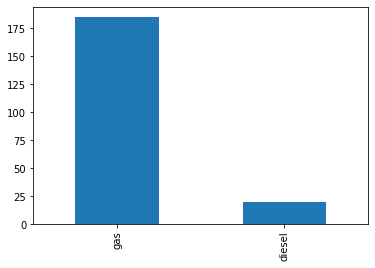

In [36]:
data['fuel-type'].value_counts().plot.bar()
# From this data, show us that car with gas fuel type is sells better than diesel fuel type

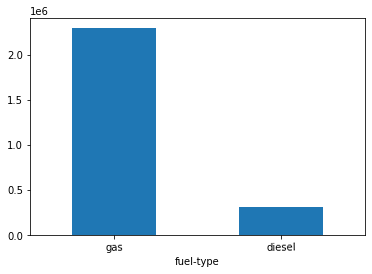

In [37]:
# Visualization about fuel type and prize
data.groupby('fuel-type')['price'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=1)
plt.show()

# From this data, show us that car with gas fuel type is more expensive than diesel fuel type

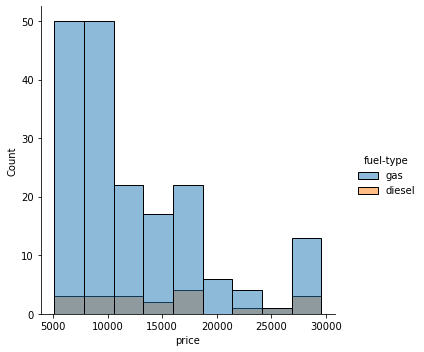

In [38]:
# Comparation Histogram price every kind of fuel type
sns.displot(data, x='price', hue='fuel-type')
# From this data, show us that car with gas fuel type is more expensive than diesel fuel type

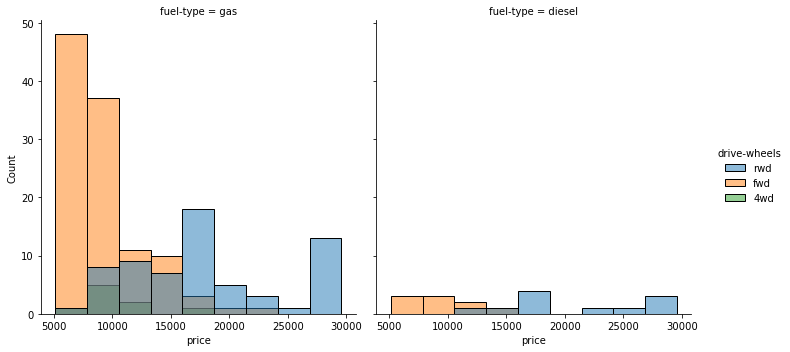

In [39]:
# Comparation Histogram price every kind of fuel type
sns.displot(data, x='price', hue='drive-wheels', col='fuel-type')
# From this data, show us that car with fwd gas fuel type is the most expensive than the others

**Apakah tipe bahan bakar mempengaruhi harga?**

#### Ya sangat berpengaruh. Melihat dari data, bahwa tipe bahan bakar 'gas' memiliki harga jual yang lebih tinggi dan juga jumlah pembelian yang lebih banyak daripada tipe bahan bakar 'diesel'. Ada beberapa sebaran data yang menyatakan kalau tipe bahan bakar 'gas' dengan 'fwd' drive wheels paling mahal dibandingkan tipe bahan bakar drive wheels lainnya.

# Data Preparation

#### Encode Data

In [40]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [41]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Numerical Columns
1. symboling
2. normalized-losses
3. wheel-base
4. length
5. width
6. height
7. curb-weight
8. engine-size
9. bore
10. stroke
11. compression-ratio
12. horsepower
13. peak-rpm
14. city-mpg
15. highway-mpg
16. price


Biner Category Columns
1. fuel-type = gas, diesel
2. aspiration = std, turbo
3. num-of-doors = two, four
4. engine-type = rear, front


Multi Category Columns
1. make
2. body-style
3. drive-wheels
4. engine-location
5. num-of-cylinders
6. fuel-system

In [42]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['symboling']
num_cols   = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
              'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

#Biner category columns
bin_cols   = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-type']

#Multi category columns
multi_cols = ['make', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders', 'fuel-system']

#Label encoding Biner category columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi category columns
data=pd.get_dummies(data = data,columns = multi_cols,drop_first=False)

In [43]:
data

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,1,1,0,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,1,0,0,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,0,0,1,0,0
203,-1,95.0,0,1,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,1,0,0,0,0


**Train Test Split**

In [44]:
data=data.drop(labels="symboling",axis=1)

In [45]:
data

,normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-type,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,115.0,1,0,1,88.6,168.8,64.1,48.8,2548,0,...,0,0,0,0,0,0,0,1,0,0
1,115.0,1,0,1,88.6,168.8,64.1,48.8,2548,0,...,0,0,0,0,0,0,0,1,0,0
2,115.0,1,0,1,94.5,171.2,65.5,52.4,2823,5,...,0,0,0,0,0,0,0,1,0,0
3,164.0,1,0,0,99.8,176.6,66.2,54.3,2337,3,...,0,0,0,0,0,0,0,1,0,0
4,164.0,1,0,0,99.4,176.6,66.4,54.3,2824,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,1,0,0,109.1,188.8,68.9,55.5,2952,3,...,0,0,0,0,0,0,0,1,0,0
201,95.0,1,1,0,109.1,188.8,68.8,55.5,3049,3,...,0,0,0,0,0,0,0,1,0,0
202,95.0,1,0,0,109.1,188.8,68.9,55.5,3012,5,...,0,0,0,0,0,0,0,1,0,0
203,95.0,0,1,0,109.1,188.8,68.9,55.5,3217,3,...,0,0,0,0,0,1,0,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='fuel-type',axis=1)
train_Y = train['fuel-type']
test_X  = test.drop(labels='fuel-type',axis=1)
test_Y  = test['fuel-type']

In [47]:
train_Y.value_counts()

1    147
0     17
Name: fuel-type, dtype: int64

<AxesSubplot:>

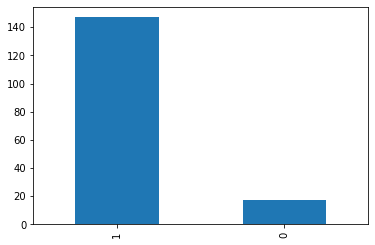

In [48]:
train_Y.value_counts().plot.bar()

In [49]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [51]:
train_Y.value_counts() # Before SMOTE

1    147
0     17
Name: fuel-type, dtype: int64

In [52]:
train_smote_Y.value_counts() # After SMOTE

fuel-type
1            147
0            147
dtype: int64

<AxesSubplot:xlabel='fuel-type'>

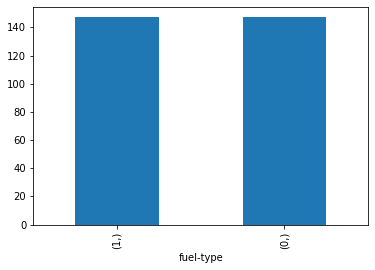

In [55]:
train_smote_Y.value_counts().plot.bar() # After SMOTE

**Scaling**

Note : Lakukan scaling hanya pada data training

In [54]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_smote_X_2=train_smote_X
test_X_2=test_X
train_smote_X_2[num_cols]=ss.fit_transform(train_smote_X_2[num_cols])
test_X_2[num_cols]=ss.transform(test_X_2[num_cols])